# A2DI : TP1 - k-ppv

## Récupération et traitement des données

(Question 1 et 2)

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import time

# Permet l'affichage des graphiques

%matplotlib inline

# Récupération des données

data = datasets.load_iris()

# Récupération des valeurs utiles

n          = len(data['data'])
nb_classes = len(data['target_names'])
nb_attr    = len(data['feature_names'])

(Question 3)
La fonction suivante permet de générer à chaque fois un ensemble partagé pour l'apprentissage et pour les tests.

In [2]:
# Fonction de génération des ensembles

def generate_sets():
    x = [data['data'][0:50], data['data'][50:100], data['data'][100:150]]
    y = [data['target'][0:50], data['target'][50:100], data['target'][100:150]]
    X_app = []
    X_test = []
    Y_app = []
    Y_test = []
    
    # On prend 25 données dans les 3 classes
    for i in range(3):
        indexs = [w for w in range(50)]
        np.random.shuffle(indexs)

        for j in range(len(x[i])):
            if j < 25:
                X_app.append(x[i][indexs[j]])    
                Y_app.append(y[i][indexs[j]])
            else:
                X_test.append(x[i][indexs[j]])
                Y_test.append(y[i][indexs[j]])
    
    return X_app, Y_app, X_test, Y_test

# Création des deux ensembles d'apprentissage et de test

X_app, Y_app, X_test, Y_test = generate_sets()

## Algorithme k-ppv

(Question 4)
Afin de pouvoir utiliser l'algorithme k-ppv, il faut définir la notion de distance. Nous allons donc pour commencer créer une fonction permettant le calcul de la distance entre deux données.

On va calculer la somme des différence au carré entre les deux données (le carré nous permet d'avoir une valeur toujours positive), et renvoyé au final la racine carré de cette somme.

In [3]:
# Permet de renvoyer la distance entre deux exemples

def compute_distance(x, y):
    distance = 0
    for i in range(nb_attr):
        distance += (x[i] - y[i]) * (x[i] - y[i])
    return np.sqrt(distance)

Maintenant qu'on peut évaluer facilement les distances, on va développer l'algorithme k-ppv qui nous renverra une prédiction de classe pour une donnée x.

In [4]:
# Algorithme des k plus proches voisins

def kppv(x, xapp, yapp, k):
    # On commence par calculer la distance de x
    # avec toutes les autres données et on trie
    # le résultat par ordre croissant.

    distances = []
    for i in range(len(xapp)):
        distances.append(compute_distance(x, xapp[i]))
        
    sort_index_distances = np.argsort(distances)
    
    # On crée le tableau des classes "les plus proches"
    # et on décide ainsi laquelle est la plus proche
    neighbours_classes = []
    for i in range(k):
        neighbours_classes.append(yapp[sort_index_distances[i]])
    
    repartition = np.bincount(neighbours_classes)
    prediction  = np.argmax(repartition)
    
    return prediction

print("Test d'utilisation pour x = [1,2,3,4] et k = 5")
print("Classe prédite : ", end='')
print(kppv([1,2,3,4], X_app, Y_app, 5))

Test d'utilisation pour x = [1,2,3,4] et k = 5
Classe prédite : 1


## Test et performance

(Question 5)
On va commencer par tester le taux de de prédiction sur l'ensemble de test avec k = 5.

In [5]:
# Test sur un jeu de test

t = 0
for i in range(len(X_test)):
    if (kppv(X_test[i], X_app, Y_app, 5) == Y_test[i]):
        t += 1

print("Le taux de prédiction sur ce jeu de test est : ", end='')
print((t/75)*100, end='')
print("%")

Le taux de prédiction sur ce jeu de test est : 96.0%


(Question 6) Maintenant on va tester le taux de bonne classification en faisant varier k de 1 à 75 et modéliser le résultat à l'aide d'une courbe.

[0.9733333333333334, 0.9466666666666667, 0.9733333333333334, 0.9866666666666667, 0.96, 0.96, 0.96, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9733333333333334, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9866666666666667, 0.9733333333333334, 0.96, 0.9733333333333334, 0.9866666666666667, 0.96, 0.9733333333333334, 0.9466666666666667, 0.9733333333333334, 0.96, 0.9733333333333334, 0.96, 0.9733333333333334, 0.9466666666666667, 0.9466666666666667, 0.9333333333333333, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.9066666666666666, 0.92, 0.9066666666666666, 0.9066666666666666, 0.8933333333333333, 0.9066666666666666, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6666666666666666, 0.6666666666666666, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.6533333333333333, 0.653333333333333

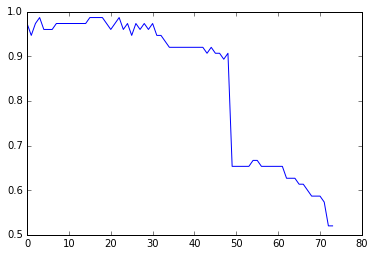

In [6]:
# Test sur un jeu de test

kv = []
for k in range(1,len(X_test)):
    t = 0
    for i in range(len(X_test)):
        if (kppv(X_test[i], X_app, Y_app, k) == Y_test[i]):
            t += 1
    kv.append(t/len(X_test))

print(kv)
plt.plot(kv)

Comme on peut le voir sur la couble, les meilleurs résultats sont obtenus lorsque k est dans l'intervalle approximative [5;20].

(Question 7) On va maintenant chercher à calculer le temps moyen d'exécution de l'algorithme k-ppv en fonction de la taille de l'ensemble d'apprentissage. On prendra ici un morceau de l'ensemble sans faire attention à la bonne répartition, puisque nous nous intéressons ici uniquement au temps d'exécution. On va faire varier la taille de l'ensemble de 20% à 95% par tranche de 5% en faisant 100 appels à la fonction pour calculer une moyenne.

<Container object of 16 artists>

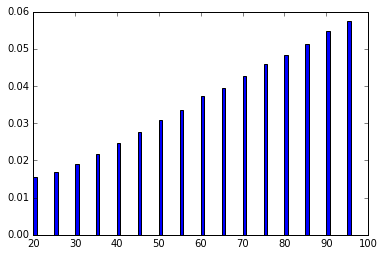

In [7]:
# Test du temps d'exécution en fonction de la taille de l'ensemble d'apprentissage

x = [1,2,3,4]
time_value = []
label_value = []
for i in range(20, 100, 5):
    percent = int(n*(i/100))
    X_in = data['data'][0:percent]
    Y_in = data['target'][0:percent]
    t1 = time.time()
    for t in range(100):
        kppv(x, X_in, Y_in, 10)
    t2 = time.time() - t1
    time_value.append(t2)
    label_value.append(i)

plt.bar(label_value, time_value, 0.8)

Comme on peut le voir sur le graphique, le temps d'exécution augmente de façon linéaire en fonction de la taille de l'ensemble d'apprentissage, ce qui est particulièrement mauvais. Le mieux serait d'avoir une réponse en temps constant.